In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('zomato.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       604 non-null    object 
 1   Open       604 non-null    float64
 2   High       604 non-null    float64
 3   Low        604 non-null    float64
 4   Close      604 non-null    float64
 5   Adj Close  604 non-null    float64
 6   Volume     604 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.2+ KB


In [16]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [17]:
train = data.loc[:, ['Open']].values
train

array([[116.      ],
       [126.349998],
       [141.699997],
       [131.      ],
       [134.949997],
       [142.600006],
       [135.75    ],
       [137.      ],
       [139.800003],
       [138.75    ],
       [135.5     ],
       [132.399994],
       [131.      ],
       [123.      ],
       [135.649994],
       [133.850006],
       [136.399994],
       [132.800003],
       [134.5     ],
       [134.949997],
       [137.800003],
       [127.25    ],
       [126.      ],
       [125.25    ],
       [126.599998],
       [127.849998],
       [134.      ],
       [134.550003],
       [132.      ],
       [135.949997],
       [149.25    ],
       [144.899994],
       [141.      ],
       [141.399994],
       [143.25    ],
       [145.149994],
       [142.949997],
       [143.      ],
       [142.550003],
       [137.699997],
       [137.199997],
       [135.399994],
       [134.5     ],
       [137.550003],
       [139.850006],
       [143.899994],
       [138.      ],
       [139.1

# Feature Scaling:

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.62468832],
       [0.71072322],
       [0.83832088],
       [0.7493766 ],
       [0.78221116],
       [0.84580226],
       [0.78886122],
       [0.79925191],
       [0.82252708],
       [0.81379888],
       [0.78678309],
       [0.76101412],
       [0.7493766 ],
       [0.68287618],
       [0.78802992],
       [0.77306742],
       [0.79426433],
       [0.76433922],
       [0.77847053],
       [0.78221116],
       [0.80590198],
       [0.71820453],
       [0.70781384],
       [0.70157942],
       [0.71280135],
       [0.72319204],
       [0.77431426],
       [0.77888619],
       [0.75768915],
       [0.79052371],
       [0.90108068],
       [0.86492103],
       [0.83250212],
       [0.83582709],
       [0.85120536],
       [0.86699916],
       [0.84871157],
       [0.84912723],
       [0.8453866 ],
       [0.80507068],
       [0.8009144 ],
       [0.78595178],
       [0.77847053],
       [0.80382384],
       [0.82294274],
       [0.85660847],
       [0.80756447],
       [0.817

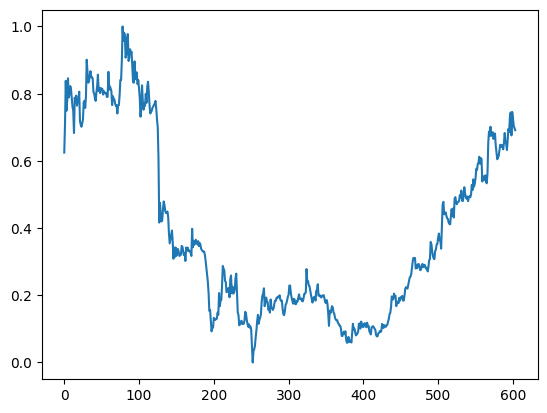

In [19]:
plt.plot(train_scaled)

# Create Data Structure:

In [21]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 604):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

Reshape:

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create RNN Model

In [23]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.6820
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2894
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2730
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2264
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1897
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1855
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1595
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1220
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1011
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1041
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0900
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0843
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0722
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0628
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - lo

# Prediction and Visualization of RNN Model

In [24]:
data_test = pd.read_csv('zomato test.csv')

In [25]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2024,124.449997,125.599998,122.849998,124.500000,124.500000,24228685
1,02-01-2024,127.000000,129.449997,125.500000,128.699997,128.699997,69395959
2,03-01-2024,128.800003,130.250000,127.099998,127.550003,127.550003,39101172
3,04-01-2024,128.399994,130.899994,126.449997,129.750000,129.750000,45285624
4,05-01-2024,130.899994,134.350006,128.949997,133.300003,133.300003,55608923


In [26]:
real_stock_price = data_test.loc[:, ['Open']].values
real_stock_price

array([[124.449997],
       [127.      ],
       [128.800003],
       [128.399994],
       [130.899994],
       [133.649994],
       [133.199997],
       [134.25    ],
       [135.300003],
       [140.      ],
       [139.550003],
       [135.      ],
       [132.399994],
       [128.050003],
       [130.5     ],
       [135.050003],
       [136.300003],
       [131.449997],
       [135.899994],
       [136.899994],
       [135.850006],
       [140.      ],
       [141.      ],
       [141.800003],
       [145.      ],
       [140.399994],
       [141.      ]])

In [27]:
#Getting the predicted stock price
data_total = pd.concat((data['Open'], data_test['Open']), axis=0)
inputs = data_total[len(data_total)-len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.59559438],
       [0.61221949],
       [0.59143811],
       [0.60806321],
       [0.60640073],
       [0.53865342],
       [0.55403162],
       [0.55278472],
       [0.54322528],
       [0.556941  ],
       [0.53823776],
       [0.53325024],
       [0.56483797],
       [0.65461349],
       [0.68744811],
       [0.67456363],
       [0.70157942],
       [0.67456363],
       [0.67996681],
       [0.68536997],
       [0.66541984],
       [0.67456363],
       [0.68162928],
       [0.64588535],
       [0.62468832],
       [0.60473817],
       [0.60931011],
       [0.61554453],
       [0.63300087],
       [0.64796349],
       [0.64131342],
       [0.64754784],
       [0.64048218],
       [0.63424777],
       [0.65461349],
       [0.68287618],
       [0.65752287],
       [0.64962597],
       [0.63216963],
       [0.66625108],
       [0.69534501],
       [0.68620122],
       [0.7327515 ],
       [0.74397349],
       [0.67581053],
       [0.74563598],
       [0.72859522],
       [0.705

In [28]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


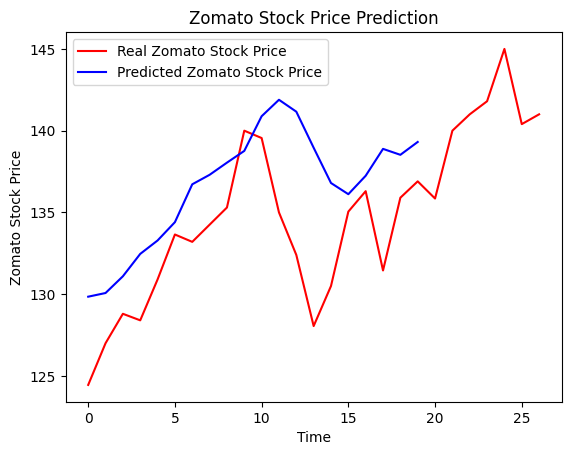

In [30]:
plt.plot(real_stock_price, color='red', label='Real Zomato Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Zomato Stock Price')
plt.title('Zomato Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Zomato Stock Price')
plt.legend()
plt.show()